<a href="https://colab.research.google.com/github/146790g/CIFAR10-2CNN/blob/master/CIFAR10_2CNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 2CNN Prediction

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow 2.x.

In [17]:
%tensorflow_version 2.x


In [18]:
%pwd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##第１章　Visual Predictive Check

####[CCC-01]
Import modules and set a random seed.

In [19]:
result_dir = '/content/gdrive/My Drive/Colab Notebooks/CIFAR10/results'        # VGG19の出力結果を保存するフォルダー


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import os

model=load_model(os.path.join(result_dir,'CIFAR10_2CNN_model.h5'))

model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

####[CCC-02]
Download the CIFAR10 dataset and store into NumPy arrays.

In [23]:

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
#train_labels = tf.keras.utils.to_categorical(train_labels, 10)
#test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [38]:


x=test_images[0]

print(type(x))
print(x.shape)

print(test_images.shape)

print(test_labels)
print(test_labels.shape)
print(type(test_labels[:20]))


<class 'numpy.ndarray'>
(32, 32, 3)
(10000, 32, 32, 3)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)
<class 'numpy.ndarray'>


In [39]:

def predictCIFAR10(x):
  
  x2 = np.expand_dims(x, axis=0)
  pred = model.predict(x2)
  
  x3=np.argmax(pred)

  name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  
  print('モデルによる予測値は、', name[x3-1], 'です。')
  
  imgplot = plt.imshow(x2.reshape(32,32,3))
  plt.show()

モデルによる予測値は、 cat です。


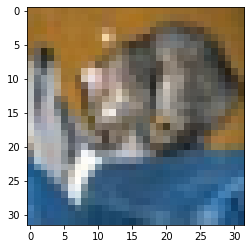

In [40]:
predictCIFAR10(test_images[0])

モデルによる予測値は、 cat です。


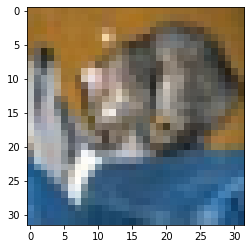

モデルによる予測値は、 automobile です。


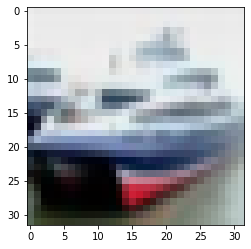

モデルによる予測値は、 automobile です。


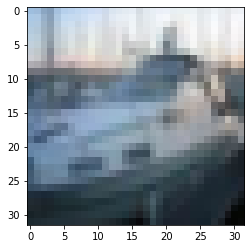

モデルによる予測値は、 airplane です。


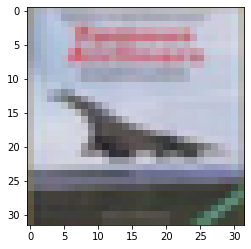

モデルによる予測値は、 frog です。


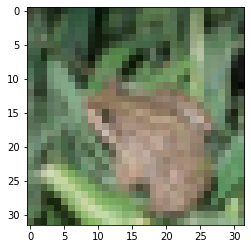

モデルによる予測値は、 frog です。


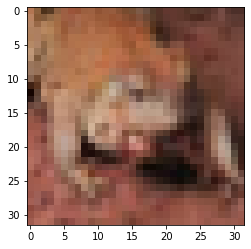

モデルによる予測値は、 automobile です。


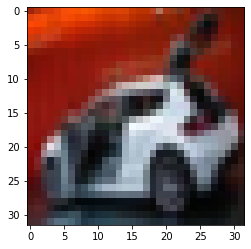

モデルによる予測値は、 frog です。


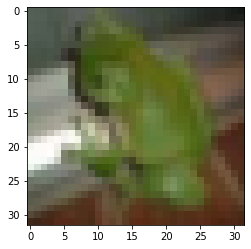

モデルによる予測値は、 cat です。


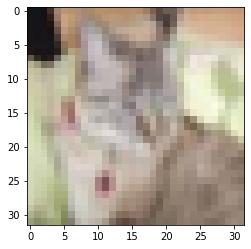

モデルによる予測値は、 automobile です。


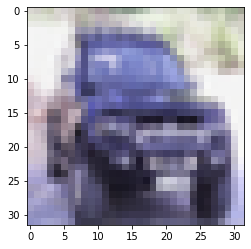

モデルによる予測値は、 airplane です。


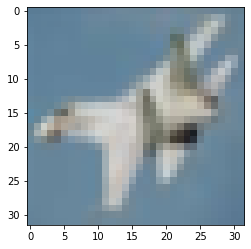

モデルによる予測値は、 truck です。


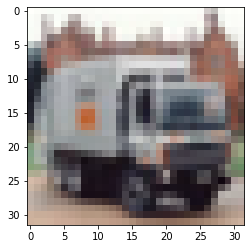

モデルによる予測値は、 frog です。


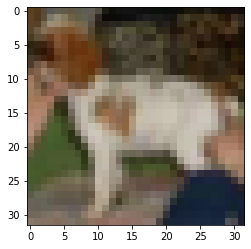

モデルによる予測値は、 horse です。


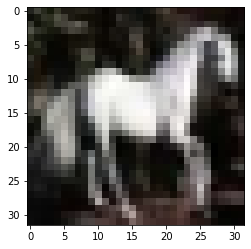

モデルによる予測値は、 truck です。


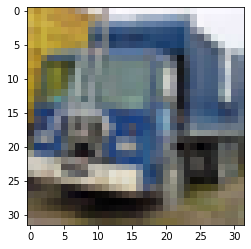

モデルによる予測値は、 ship です。


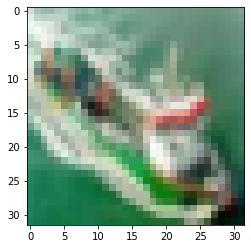

モデルによる予測値は、 dog です。


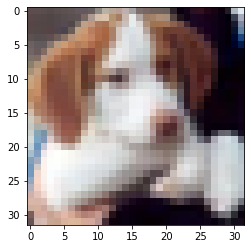

モデルによる予測値は、 horse です。


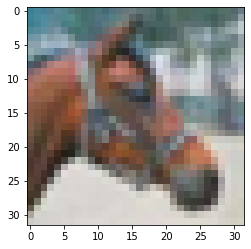

モデルによる予測値は、 ship です。


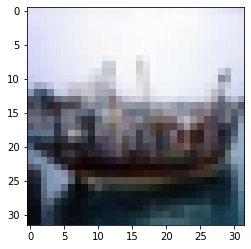

モデルによる予測値は、 frog です。


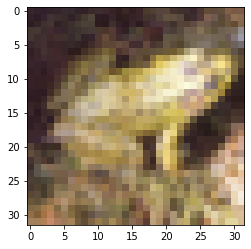

モデルによる予測値は、 horse です。


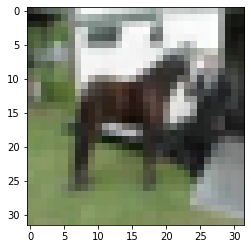

モデルによる予測値は、 airplane です。


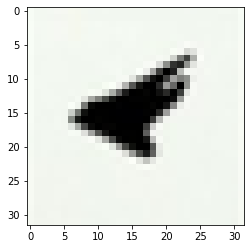

モデルによる予測値は、 deer です。


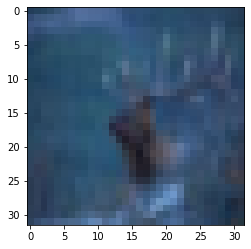

モデルによる予測値は、 truck です。


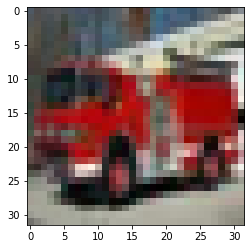

モデルによる予測値は、 deer です。


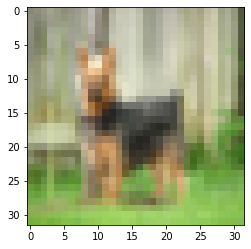

モデルによる予測値は、 frog です。


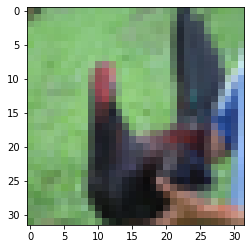

モデルによる予測値は、 deer です。


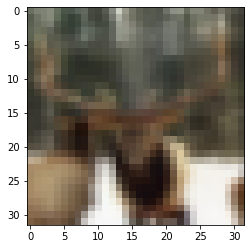

モデルによる予測値は、 airplane です。


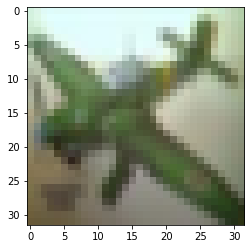

モデルによる予測値は、 truck です。


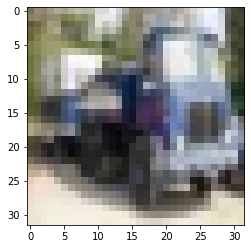

モデルによる予測値は、 frog です。


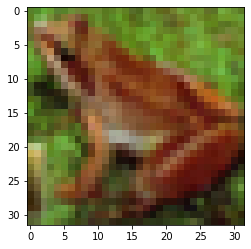

モデルによる予測値は、 frog です。


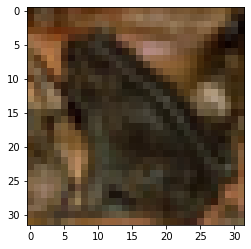

モデルによる予測値は、 dog です。


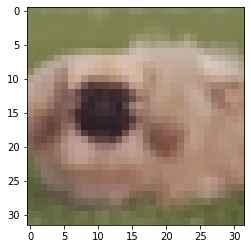

モデルによる予測値は、 bird です。


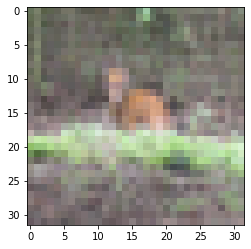

モデルによる予測値は、 cat です。


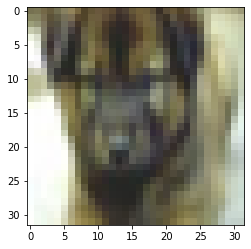

モデルによる予測値は、 truck です。


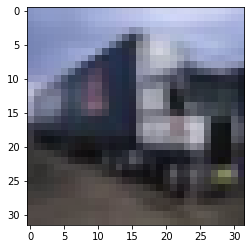

モデルによる予測値は、 ship です。


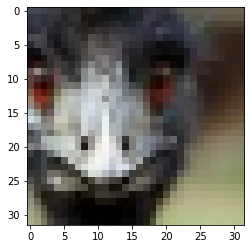

モデルによる予測値は、 deer です。


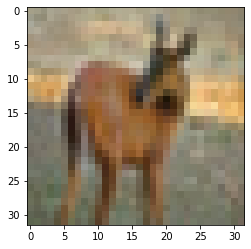

モデルによる予測値は、 truck です。


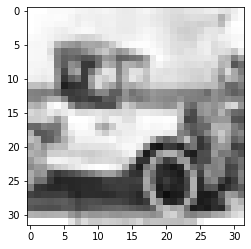

モデルによる予測値は、 truck です。


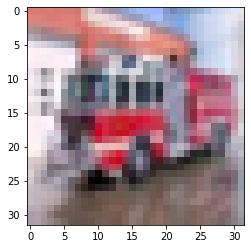

モデルによる予測値は、 dog です。


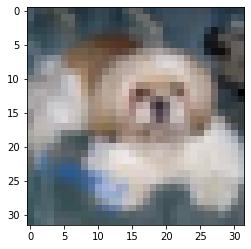

In [42]:
%matplotlib inline


for i in range(40):
  predictCIFAR10(test_images[i])